In [1]:
%matplotlib inline

# GPS data w/ python, Florian Wilhelm

https://github.com/FlorianWilhelm/gps_data_with_python/tree/master

https://youtu.be/jAKUPm-Cul0

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [36]:
import gpxpy
import gpxpy.gpx

from gps_utils import rdp

# Parsing an existing file:
# -------------------------

gpx_file = open('./data/activity_10578864150.gpx', 'r')
gpx_file = open('./data/activity_11723677324.gpx', 'r')

gpx = gpxpy.parse(gpx_file)

In [37]:
#!gpxinfo './data/activity_10578864150.gpx'
!gpxinfo './data/activity_11723677324.gpx'

File: ./data/activity_11723677324.gpx
    Length 2D: 19.271km
    Length 3D: 19.271km
    Moving time: 01:57:18
    Stopped time: 00:01:43
    Max speed: 3.44m/s = 12.38km/h (raw: 4.33m/s = 15.60km/h)
    Avg speed: 2.74m/s = 9.85km/h
    Total uphill: 0.00m
    Total downhill: 0.00m
    Started: 2023-08-06 03:20:47+00:00
    Ended: 2023-08-06 05:20:02+00:00
    Points: 1038
    Avg distance between points: 18.57m

    Track #0, Segment #0
        Length 2D: 19.271km
        Length 3D: 19.271km
        Moving time: 01:57:18
        Stopped time: 00:01:43
        Max speed: 3.44m/s = 12.38km/h (raw: 4.33m/s = 15.60km/h)
        Avg speed: 2.74m/s = 9.85km/h
        Total uphill: 0.00m
        Total downhill: 0.00m
        Started: 2023-08-06 03:20:47+00:00
        Ended: 2023-08-06 05:20:02+00:00
        Points: 1038
        Avg distance between points: 18.57m



In [38]:
moving_data = gpx.get_moving_data(raw=True)

In [39]:
moving_data

MovingData(moving_time=7038.0, stopped_time=103.0, moving_distance=19255.837330955186, stopped_distance=14.769415852315214, max_speed=4.3329256118206425)

In [40]:
segment = gpx.tracks[0].segments[0]

In [50]:
times = [p.time for p in segment.points]

In [54]:
coords = pd.DataFrame([
        {'lat': p.latitude, 
         'lon': p.longitude, 
         'ele': p.elevation,
         'time': p.time} for p in segment.points])
coords.set_index('time', drop=True, inplace=True)
coords.head(20)

,lat,lon,ele
time,,,
2023-08-06 03:20:47+00:00,41.104508,28.922366,None
2023-08-06 03:20:48+00:00,41.104508,28.922363,None
2023-08-06 03:20:56+00:00,41.104546,28.922290,None
2023-08-06 03:20:58+00:00,41.104560,28.922266,None
2023-08-06 03:21:02+00:00,41.104592,28.922225,None
2023-08-06 03:21:03+00:00,41.104601,28.922212,None
2023-08-06 03:21:07+00:00,41.104634,28.922162,None
2023-08-06 03:21:10+00:00,41.104661,28.922133,None
2023-08-06 03:21:11+00:00,41.104674,28.922122,None


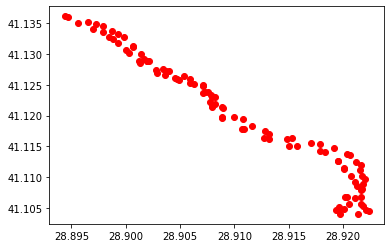

In [42]:
nskip=10
#plt.plot(coords['lon'].values, coords['lat'].values)
plt.plot(coords['lon'].values[::nskip], coords['lat'].values[::nskip], 'ro');

# Elevation

In [43]:
import srtm
elevation_data = srtm.get_data()
elevation_data.add_elevations(gpx, smooth=True)

ModuleNotFoundError: No module named 'srtm'

In [44]:
coords['srtm'] = [p.elevation for p in gpx.tracks[0].segments[0].points]

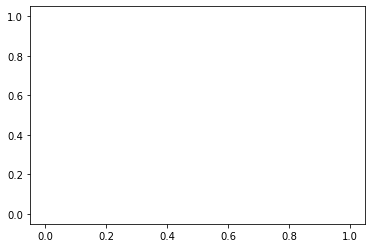

In [45]:
plt.plot( coords[['srtm']].values)

# Plot with mplleaflet

In [46]:
# prepare 3-laender-giro gps track
simple_coords = rdp(coords[['lon', 'lat']].values, epsilon=1e-5)

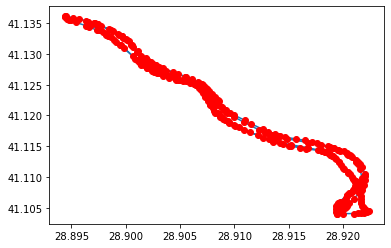

In [47]:
fig = plt.figure()
plt.plot(simple_coords[:, 0], simple_coords[:, 1])
plt.plot(simple_coords[:, 0], simple_coords[:, 1], 'ro');

In [48]:
import mplleaflet
mplleaflet.display(fig=fig) # .show(fig=fig) to display in new window

/home/subasi/miniconda3/envs/juplab/lib/python3.7/site-packages/IPython/core/display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Speed

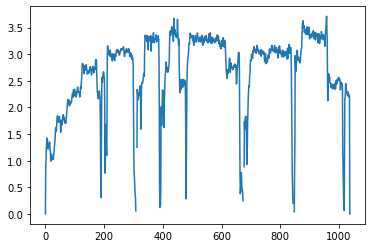

In [49]:
segment.points[0].speed, segment.points[-1].speed = 0., 0.
gpx.add_missing_speeds()
speed = np.array([p.speed for p in segment.points])
plt.plot(speed);